<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Measure/M04_Reading_and_writing_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04 Measure** Reading and writing files

```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2024
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook covers ways to read and write flies. It assumes you've understood the first two notebooks. In particular, how to load external Python libraries and packages, and the basics of data structures and functions.

The notebook covers the following files:

- Comma-separated value (CSV) files for tabular data
- GeoJSON for more web-based geospatial data
- Shapefiles (SHP) for more GIS geospatial data
- Image files

⚠ **Reminder about saving files on Colab notebooks**

_Please keep in mind that any files you create in a Colab notebook are **temporarily** stored on the cloud. You must download these files to save them, or write them directly into your Drive._

In [ ]:
!pip install geopandas --quiet


This notebook relies on a few libraries, so we will import them now:

In [1]:
import os
import json
import pandas as pd
import geopandas as gpd
import PIL
from pathlib import Path

Finally, you'll need the example data located [here](https://github.com/brian-ho/intro-to-urban-data/tree/main/Measure/Example%20Data) on GitHub. Upload this to someplace in Google Drive, and update the variable accordingly with the right path.

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

In [2]:
EXAMPLE_DATA_DIRECTORY = "example_data"

## CSV files
Comma-separated values files contain tabular or two-dimensional data. You can think of them as basic spreadsheets or tables — just the numbers and values, without formulas or formatting. The data is organized into rows and columns, with the first row typically serving as column headers.

Here's data the you might expect to store in a CSV

| first_column | second_column | third_column |
| --- | --- | --- |
| 1 | A | D |
| 2 | B | E |
| 3 | C | F |

CSVs get their name because they are in fact written out as plain text files. Rows are each a line, and the columns are separated by ... commas! So the above would look something like:

```
first_column,second_column,third_column
1,A,D
2,B,E
3,C,F
```


You can load any CSV using `pandas` and the helpful `read_csv` function. The tabular data becomes a `DataFrame`.

In [3]:
# Reads a CSV file on Google Drive
example_dataframe = pd.read_csv(Path(EXAMPLE_DATA_DIRECTORY) / "example.csv")
example_dataframe

,first_column,second_column,third_column,fourth_column
0,1,A,D,10.0
1,2,B,E,9.0
2,3,C,F,8.0


As a `DataFrame`, you can perform a number of basic views, analysis, and calculations.

In [4]:
# We can get the basic length and size of the table
print(f"Length of the dataframe: {len(example_dataframe)}")
print(f"Dimensions of the dataframe: {example_dataframe.shape}")

Length of the dataframe: 3
Dimensions of the dataframe: (3, 4)


In [5]:
# We can access any column of a dataframe based on its name
example_dataframe["first_column"]

0    1
1    2
2    3
Name: first_column, dtype: int64

In [6]:
# We can do basic statistics on a given column
print(f'Average of the first column is {example_dataframe["first_column"].mean()}')
print(f'Max of the first column is {example_dataframe["first_column"].max()}')
print(f'Min of the first column is {example_dataframe["first_column"].min()}')

Average of the first column is 2.0
Max of the first column is 3
Min of the first column is 1


In [7]:
# We can even compute across columns
example_dataframe["first_column"] * example_dataframe["fourth_column"]

0    10.0
1    18.0
2    24.0
dtype: float64

In the future, you'll be able to edit and work with this data in Python. For now, we'll skip right to writing. You can create a CSV file from this data with the equally helpful `to_csv` method.

This time, you need to call this from the `DataFrame` itself. The first argument is the file name and path.

In [8]:
# This create a temporary file on the cloud computer running your Colab notebook
example_dataframe.to_csv("saved_example.csv", index=False)

In [10]:
# Or, you can write directly to your Google Drive using a path under "/context/drive/..."
example_dataframe.to_csv(
    Path(EXAMPLE_DATA_DIRECTORY) / "saved_example.csv", index=False
)

A dataframe can be converted into more typical Python data structures, like dictionaries and lists.

In [11]:
# Convert a dataframe to a dictionary. Pandas supports multiple ways to do this!
example_dict = example_dataframe.to_dict()
example_dict

{'first_column': {0: 1, 1: 2, 2: 3},
 'second_column': {0: 'A', 1: 'B', 2: 'C'},
 'third_column': {0: 'D', 1: 'E', 2: 'F'},
 'fourth_column': {0: 10.0, 1: 9.0, 2: 8.0}}

In [12]:
# Passing in a different argument gets us a different format.
# Can you tell what is different in this case?
example_dict = example_dataframe.to_dict(orient="list")
example_dict

{'first_column': [1, 2, 3],
 'second_column': ['A', 'B', 'C'],
 'third_column': ['D', 'E', 'F'],
 'fourth_column': [10.0, 9.0, 8.0]}

And you can create dataframe and write them to a CSV in the same way:

In [13]:
# This is but one of many ways to make a Pandas DataFrame
# Notice that we can use Python data structures to provide the data
created_dataframe = pd.DataFrame(
    {
        "first_column": [1, 2, 3],
        "second_column": ["A", "B", "C"],
        "third_column": ["D", "E", "F"],
    }
)
created_dataframe.to_csv("another_saved_example.csv", index=False)

The great thing about `Pandas` is you can also open and save a bunch of other common tabular data formats. There's a long list [here](https://pandas.pydata.org/docs/reference/io.html) but this includes Excel, JSON, and other delimited file types.

## GeoJSON files
Geospatial information you find online will often be stored as [GeoJSON files](https://geojson.org/). These can contain lots of deeper data, or they can simply be a collection of basic shapes.

GeoJSON files are by definition geo-referenced, and they will almost always use the [WGS 84 map projection](https://earth-info.nga.mil/index.php?dir=wgs84&action=wgs84): the coordinates of geometry will be in longitude-latitude decimal degrees pairs.

`GeoPandas` makes loading GeoJSONs very easy!

In [14]:
# Let's view a sample GeoJSON with Primary Land Use Tax Lot Output (PLUTO) data for NYC
example_geodata = gpd.read_file(Path(EXAMPLE_DATA_DIRECTORY) / "example_pluto.geojson")
example_geodata

,address,bbl,geometry
0,225 LIBERTY STREET,1000160125,"MULTIPOLYGON (((-74.01554 40.71338, -74.01550 ..."
1,25 ANN STREET,1000907502,"MULTIPOLYGON (((-74.00747 40.71085, -74.00729 ..."
2,146 CHAMBERS STREET,1001377504,"MULTIPOLYGON (((-74.00974 40.71565, -74.00988 ..."
3,102 BROAD STREET,1000080044,"MULTIPOLYGON (((-74.01206 40.70293, -74.01212 ..."
4,401 SOUTH END AVENUE,1000160003,"MULTIPOLYGON (((-74.01322 40.71833, -74.01319 ..."
...,...,...,...
9130,81 BROADWAY,3024700020,"MULTIPOLYGON (((-73.96571 40.71078, -73.96564 ..."
9131,103 BROADWAY,3024710008,"MULTIPOLYGON (((-73.96482 40.71073, -73.96473 ..."
9132,113 BROADWAY,3024710013,"MULTIPOLYGON (((-73.96438 40.71058, -73.96413 ..."
9133,53 BROADWAY,3024707501,"MULTIPOLYGON (((-73.96558 40.71100, -73.96568 ..."


Hmmm ... notice this produces a table. It's a useful preview of the organization of the data, but we want a map!

You can get one with `GeoDataFrame.plot()`.

<Axes: >

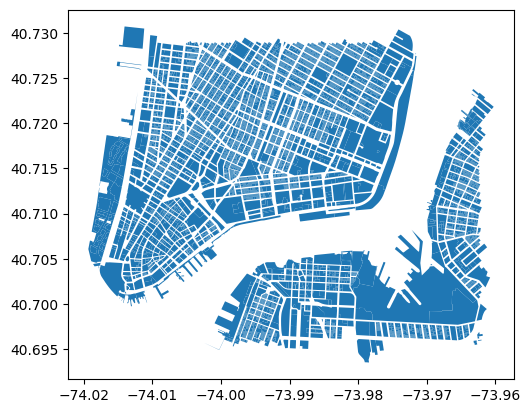

In [17]:
# Plot geospatial data
example_geodata.plot()

Much like with `Pandas` and writing CSV files, you can write GeoJSON files using `GeoPandas` natively.

You do this with the `GeoDataFrame.to_file()` method, and you must provide a `driver` argument that specifies GeoJSON as the desired format.

In [15]:
# This puts a GeoJSON file on your Colab notebook runtime
example_geodata.to_file("saved_geojson.geojson", driver="GeoJSON")

## SHP files
You can also read and write shapefiles, typically used for desktop GIS software, with `GeoPandas`. Shapefiles are usually zipflies (ZIP) or a folder containing multiple other files.

You can open the ZIP file or the folder.

<Axes: >

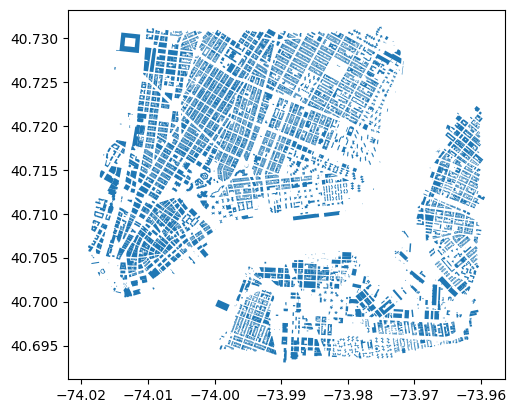

In [18]:
# Open a folder for the shapefile
buildings_geodata = gpd.read_file(Path(EXAMPLE_DATA_DIRECTORY) / "buildings")
buildings_geodata.plot()

In [18]:
# We can print each column in the buildings data
for col in buildings_geodata.columns:
    print(col)

base_bbl
bin
cnstrct_yr
doitt_id
feat_code
geomsource
globalid
groundelev
heightroof
date_lstmo
time_lstmo
lststatype
mpluto_bbl
name
shape_area
shape_len
geometry


In [20]:
# We can preview the entire table
buildings_geodata.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,globalid,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,1003060013,1003956.0,1900.0,512541.0,2100.0,Photogramm,{2403088E-77A6-4071-8B5E-D54AFBC720D9},39.0,73.130000,2017-08-22,00:00:00.000,Constructed,1003060013,NaN,0.0,0.0,"POLYGON ((-73.99304 40.71761, -73.99301 40.717..."
1,3024050006,3062926.0,1899.0,663480.0,2100.0,Photogramm,{8DC9D967-A94A-424E-B7B8-7D5C35417CA4},50.0,35.566775,2017-08-22,00:00:00.000,Constructed,3024050006,NaN,0.0,0.0,"POLYGON ((-73.96309 40.71421, -73.96312 40.714..."
2,3021370021,3059588.0,1920.0,244666.0,2100.0,Photogramm,{344E4896-64DA-4A7E-BB05-CAE68BCCB275},44.0,37.003867,2017-08-22,00:00:00.000,Constructed,3021370021,NaN,0.0,0.0,"POLYGON ((-73.96417 40.70941, -73.96417 40.709..."
3,1003760007,1004469.0,1900.0,555544.0,2100.0,Photogramm,{3D1F24B0-B09B-4FA6-8FE2-114FDCBCB3CC},8.0,54.299846,2017-08-22,00:00:00.000,Constructed,1003760007,NaN,0.0,0.0,"POLYGON ((-73.97852 40.72384, -73.97856 40.723..."
4,3023570024,3062393.0,1960.0,840996.0,2100.0,Photogramm,{1A805904-CA33-4B07-9C7C-CD18821639EE},26.0,26.390000,2017-08-22,00:00:00.000,Constructed,3023570024,NaN,0.0,0.0,"POLYGON ((-73.96369 40.71727, -73.96382 40.717..."


In [21]:
# We can perform basic calculations on the data
print(f'The average height of the roof is {buildings_geodata["heightroof"].mean()}')

The average height of the roof is 68.10383113248281


<Axes: >

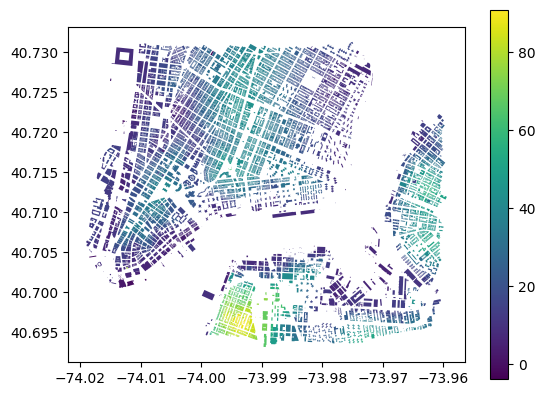

In [22]:
# We can also plot with data — in this case, coloring the geometry based on the ground elevation column
buildings_geodata.plot(column="groundelev", legend=True)

<Axes: >

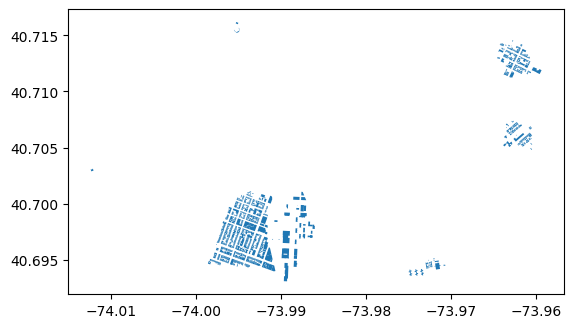

In [23]:
# We can also do basic filters!
buildings_geodata[buildings_geodata["groundelev"] > 50].plot()

... and you can write to shapefile. Note this actually produces multiple discrete files which constitute the "shapefile".

In [24]:
# The default output format is shapefile
# You can also specify driver='ESRI Shapefile'
buildings_geodata.to_file(Path(EXAMPLE_DATA_DIRECTORY) / "saved_building_shapefile")


In general, GeoJSONs tend to be simpler to work with and are much more common for web-based mapping and technology applications — we'll use those in the class for those reasons. But hopefully `geopandas` can replace some of your need for GIS software.

## Image files
Image files can be opened with `PIL`, another Python library.

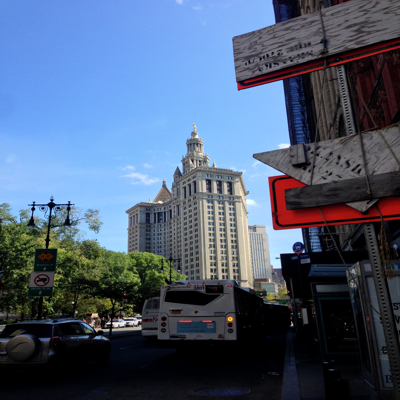

In [25]:
# We can open most supported images directly
img = PIL.Image.open(Path(EXAMPLE_DATA_DIRECTORY) / "example_image.jpg")

# JPEG files may be rotated. We can use metadata to orient them correctly!
img = PIL.ImageOps.exif_transpose(img)
img.resize((400, 400))

Note that iPhones (and other cameras) may use the [HEIC](https://en.wikipedia.org/wiki/High_Efficiency_Image_File_Format) file format. Opening these with `PIL` requires another library, `pillow-heif`.

In [ ]:
!pip install pillow-heif --quiet

In [26]:
from pillow_heif import HeifImagePlugin

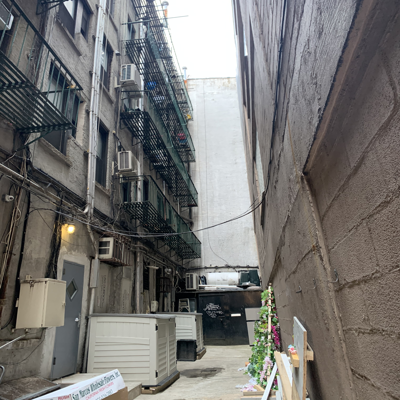

In [27]:
# Opening a HEIC photo
img = PIL.Image.open(Path(EXAMPLE_DATA_DIRECTORY) / "example_image_2.heic")
img.resize((400, 400))

Creating and saving image files is also possible! We can explore ways to create image files through Python in this class.

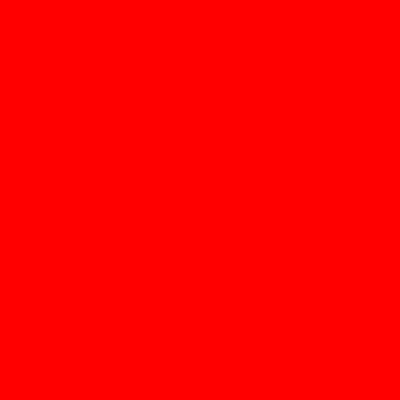

In [28]:
# This creates a not-very-exciting new image
example_img = PIL.Image.new(mode="RGB", size=(400, 400), color=(255, 0, 0))
example_img

In [27]:
# You can save it to a number of formats
example_img.save("saved_red_square.png")

# A puzzle
Let's practice reading files! Use the `example_permits.csv` file in [GitHub](https://github.com/brian-ho/intro-to-urban-data/blob/main/Measure/example_data/example_permits.csv). Load it as a `DataFrame`.

### Question 1 
How many rows are in the data?

In [29]:
# Try it out with code here!

### Question 2
What columns are in the data?

In [30]:
# Try it out with code here!

### Question 3
What is the smallest zip code in the data?

In [31]:
# Try it out with code here!

### Question 4
How many permits are in the Bronx?

In [32]:
# Try it out with code here!

### Question 5
Create and save a CSV file with just the permits in the Bronx. Upload the result to Canvas!